<a href="https://colab.research.google.com/github/chamodkandage/MagicGammaTelescope/blob/main/Magic_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [7]:
from tables.table import Cols
#import data set and Rename columns
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3long","fM3Trans","fAlpha","fDist","class" ]
df = pd.read_csv("magic04.data", names = cols)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [10]:
df["class"] = (df["class"] == "g").astype(int)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [11]:
df["class"].unique()

array([1, 0])

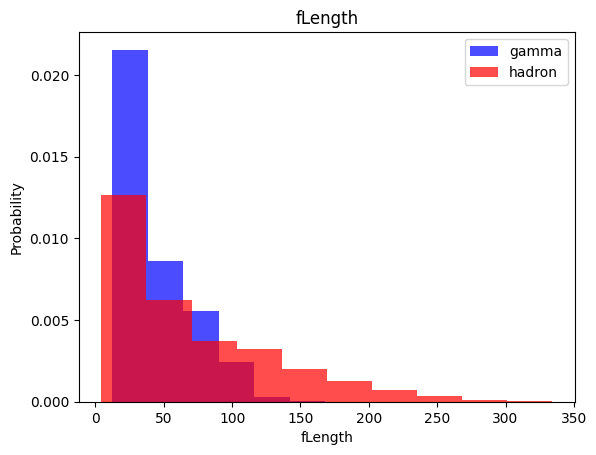

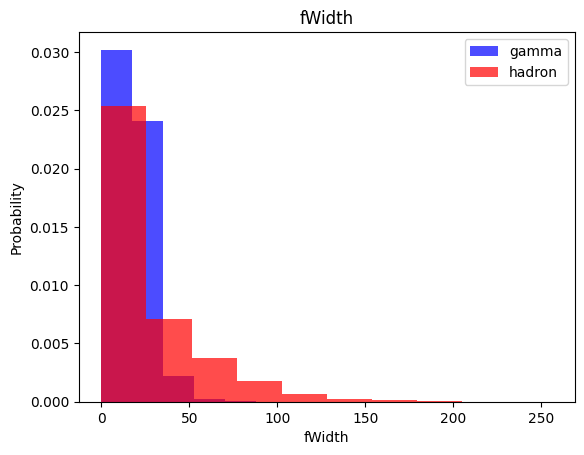

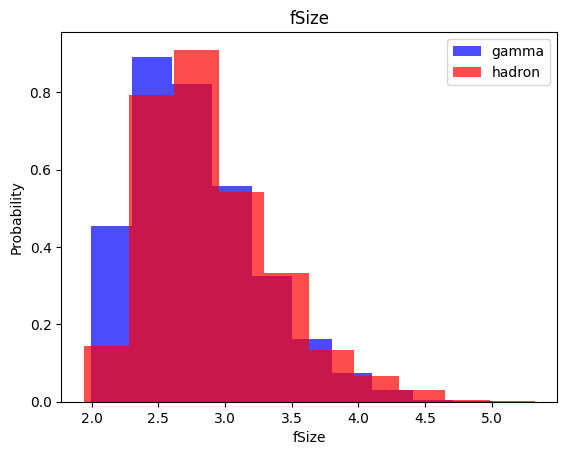

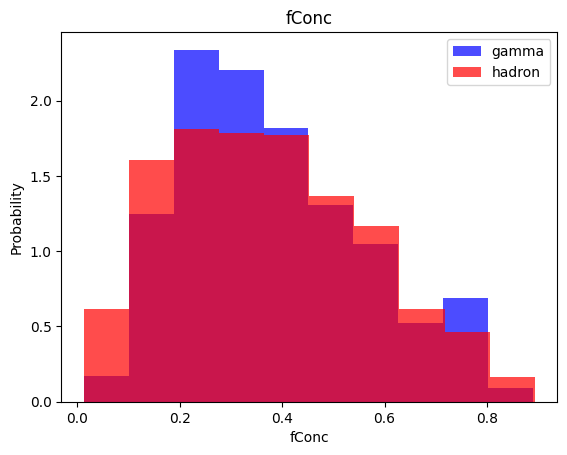

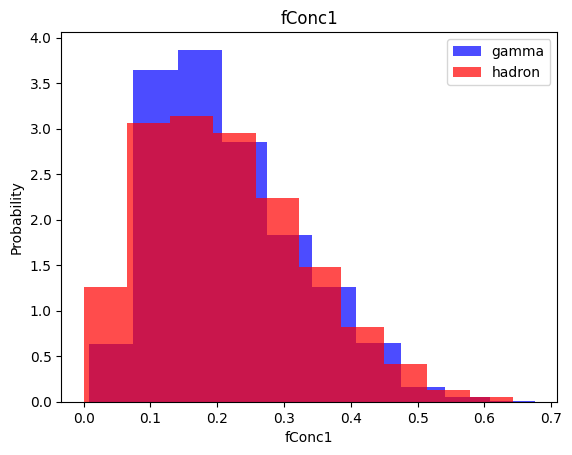

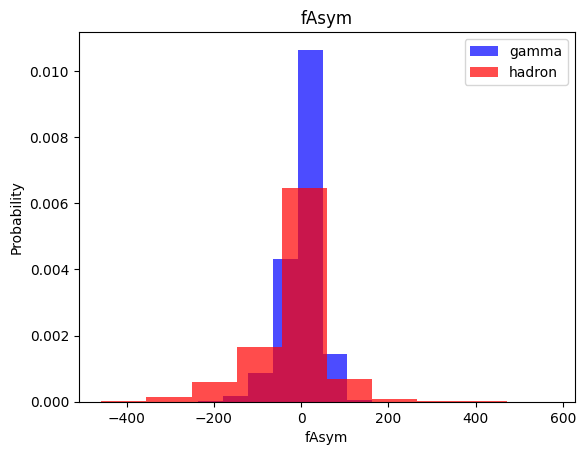

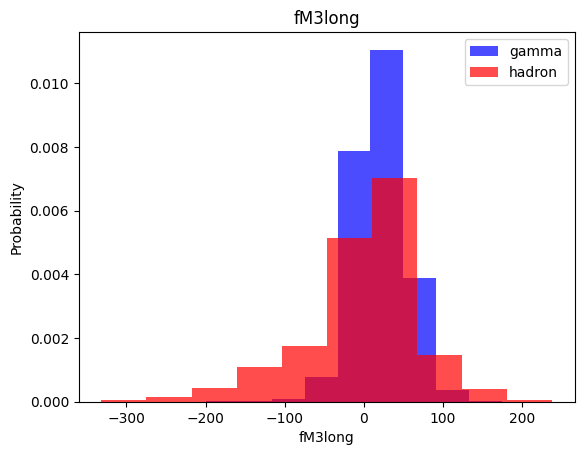

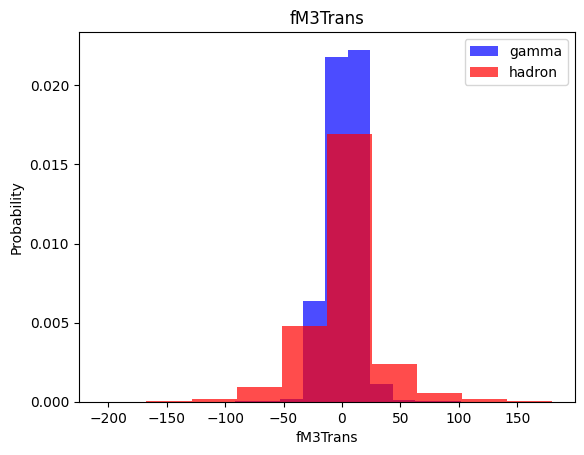

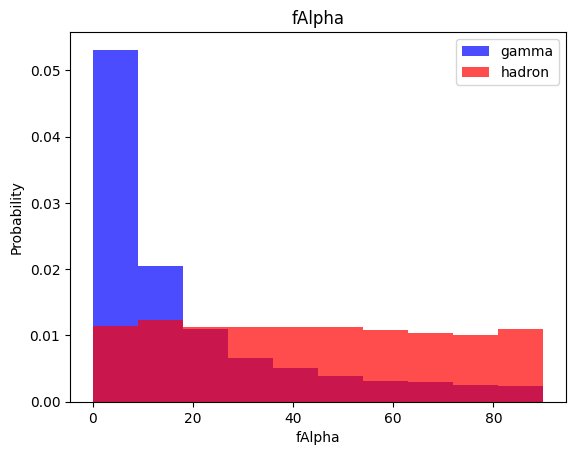

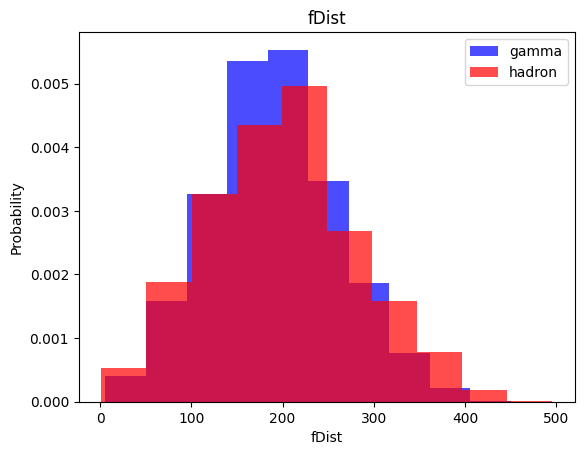

In [12]:
#gamma vs hadron distribtions
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7, density= True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7, density= True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train, Valid, test data sets


In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [14]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler =StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,Y = ros.fit_resample(X,Y)

  data = np.hstack((X,np.reshape(Y, (-1,1))))

  return data, X ,Y

In [15]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

KNN


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1372
           1       0.83      0.88      0.85      2432

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.80      0.81      0.80      3804



Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB


In [21]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [22]:
y_pred = nb_model.predict(X_test)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.50      1372
           1       0.73      0.90      0.80      2432

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



Log regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,Y_train)

In [25]:
y_pred = lg_model.predict(X_test)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1372
           1       0.83      0.81      0.82      2432

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.77      3804



SVM


In [26]:
from sklearn.svm import SVC

In [27]:
svm_model = SVC()
svm_model= svm_model.fit(X_train,Y_train)

In [28]:
y_pred = svm_model.predict(X_test)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1372
           1       0.88      0.89      0.89      2432

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



Neural net


In [29]:
import tensorflow as tf

In [40]:
def plot_history(history):
  fig, (ax1, ax2) =plt.subplots(1, 2, figsize =(10,4))
  ax1.plot(history.history['loss' ], label='loss')
  ax1.plot (history.history['val_loss'], label='val_loss')
  ax1.set_xlabel ('Epoch')
  ax1.set_ylabel ('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history[ 'val_accuracy'], label= 'val_accuracy')
  ax2.set_xlabel ('Epoch')
  ax2.set_ylabel ('Accuracy')
  ax2.grid(True)
  plt.show ()



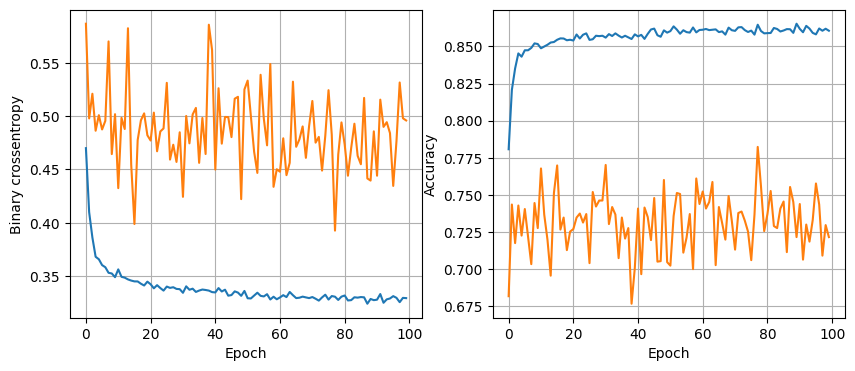

In [41]:
plot_history(history)

In [31]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation = 'relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation = 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
    metrics = ['accuracy'])

  history = nn_model.fit(
    X_train,Y_train,epochs = epochs,batch_size = batch_size, validation_split = 0.2, verbose = 0
  )

  return nn_model,history

16 nodes, dropout0,lr0.01, batch size 32


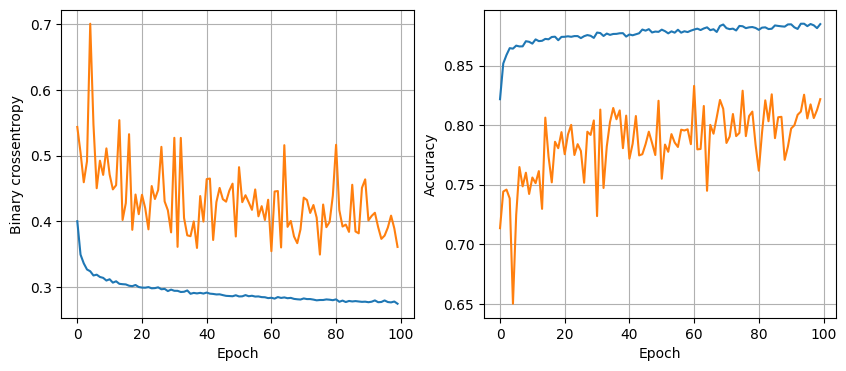

119/119 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8583
16 nodes, dropout0,lr0.01, batch size 64


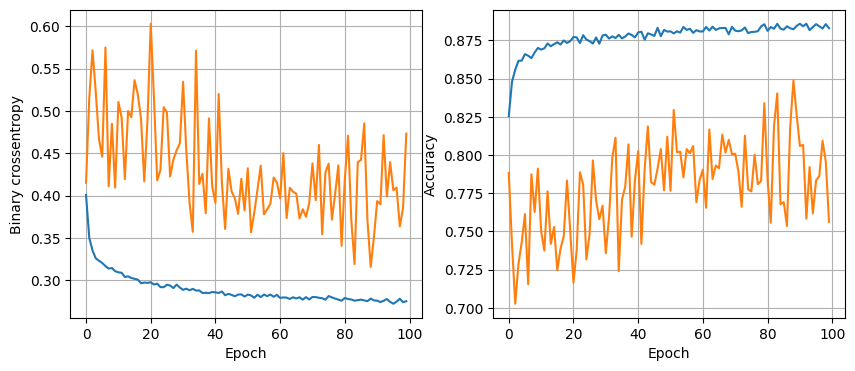

119/119 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8728
16 nodes, dropout0,lr0.01, batch size 128


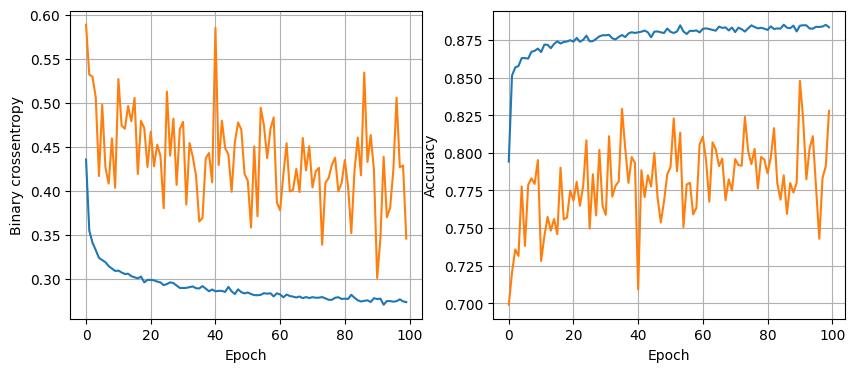

119/119 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8657
16 nodes, dropout0,lr0.005, batch size 32


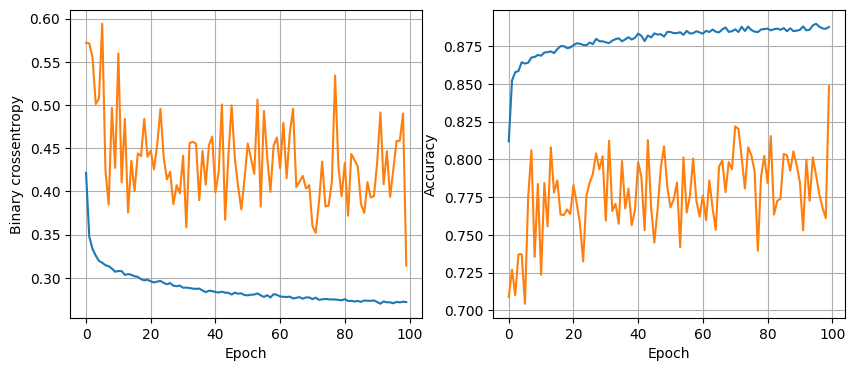

119/119 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8646
16 nodes, dropout0,lr0.005, batch size 64


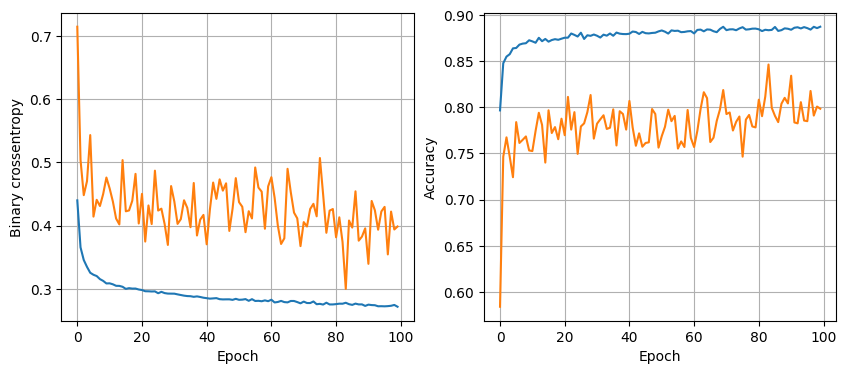

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8686
16 nodes, dropout0,lr0.005, batch size 128


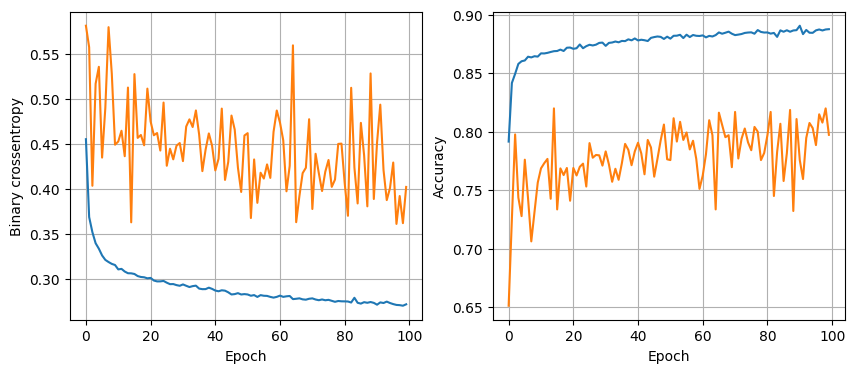

119/119 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8701
16 nodes, dropout0,lr0.001, batch size 32


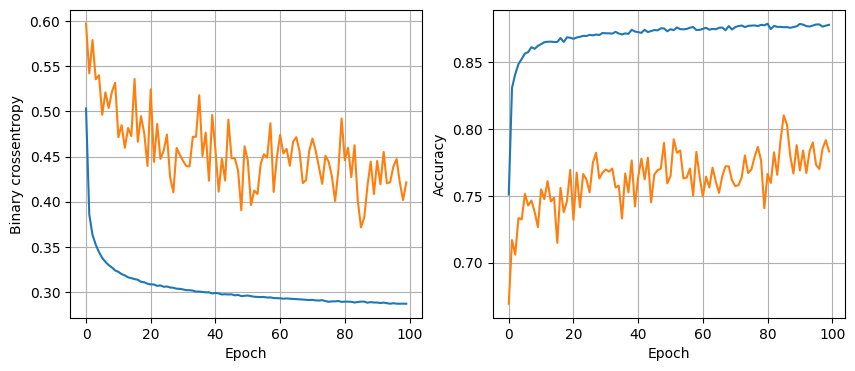

119/119 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8680
16 nodes, dropout0,lr0.001, batch size 64


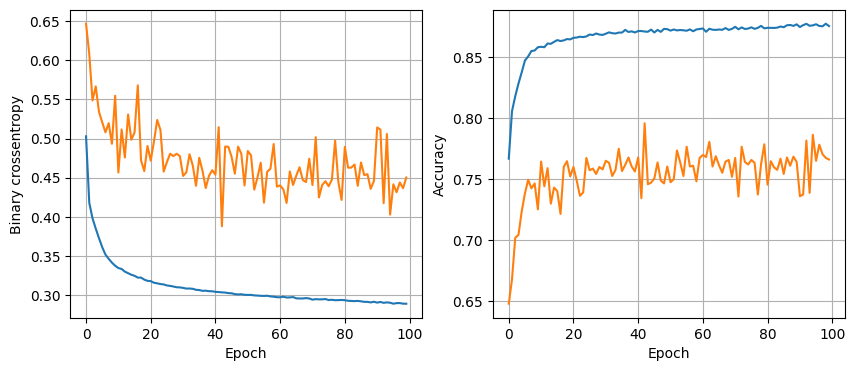

119/119 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8741
16 nodes, dropout0,lr0.001, batch size 128


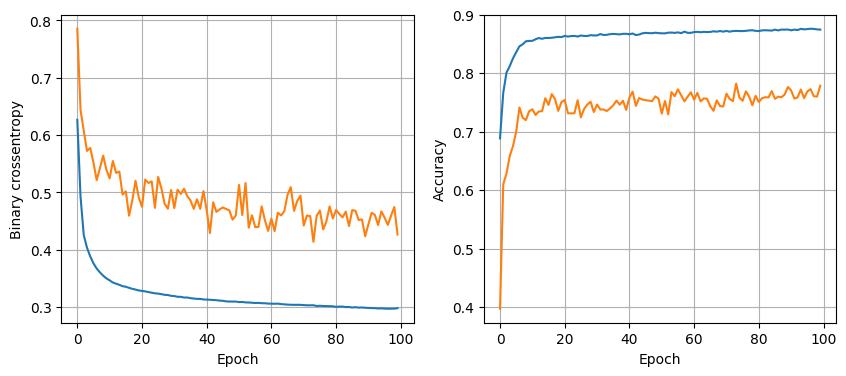

119/119 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8651
16 nodes, dropout0.2,lr0.01, batch size 32


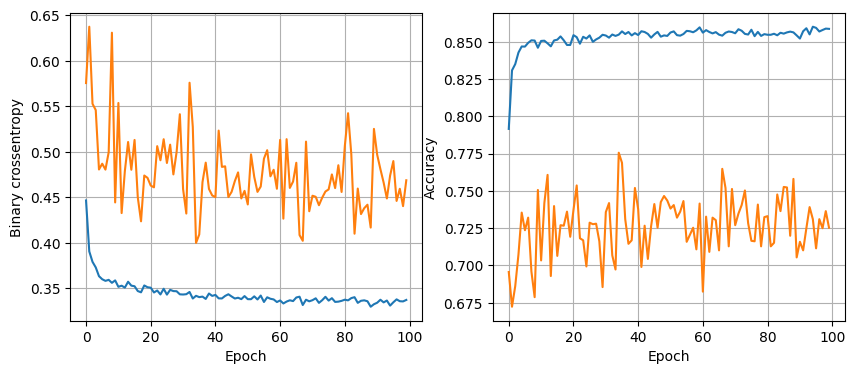

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8644
16 nodes, dropout0.2,lr0.01, batch size 64


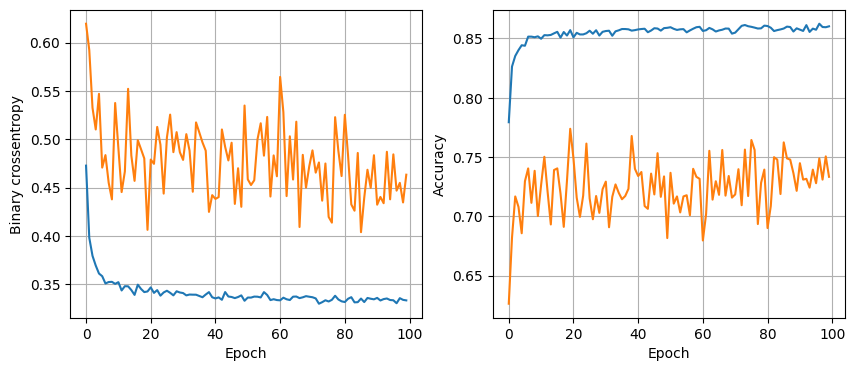

119/119 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8686
16 nodes, dropout0.2,lr0.01, batch size 128


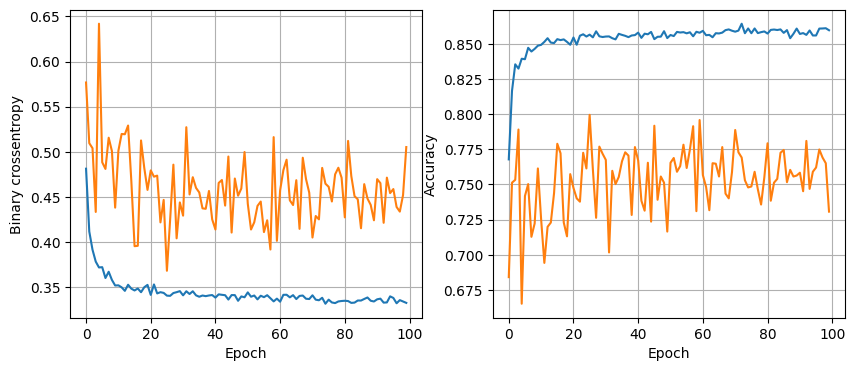

119/119 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8693
16 nodes, dropout0.2,lr0.005, batch size 32


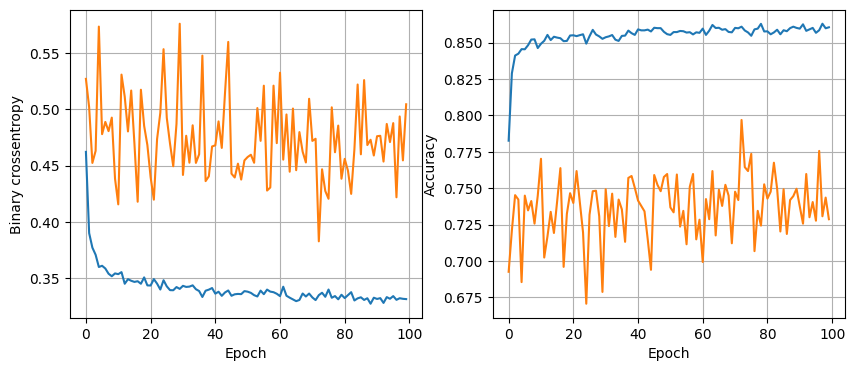

119/119 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8717
16 nodes, dropout0.2,lr0.005, batch size 64


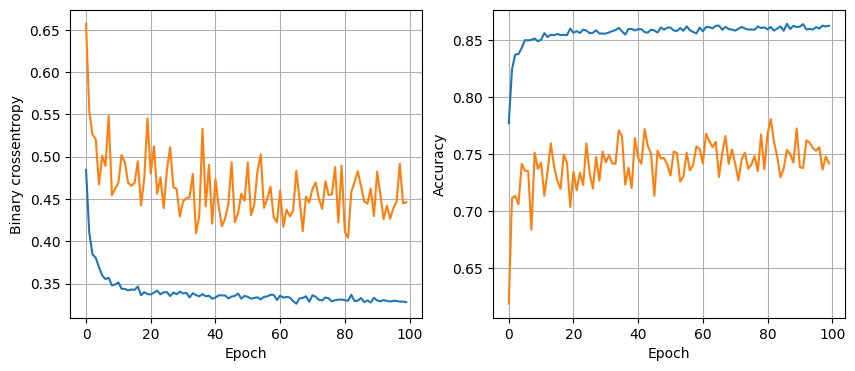

119/119 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8701
16 nodes, dropout0.2,lr0.005, batch size 128


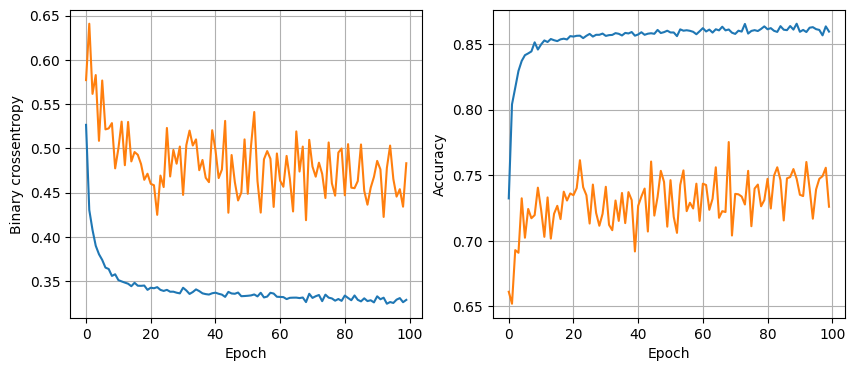

119/119 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.8725
16 nodes, dropout0.2,lr0.001, batch size 32


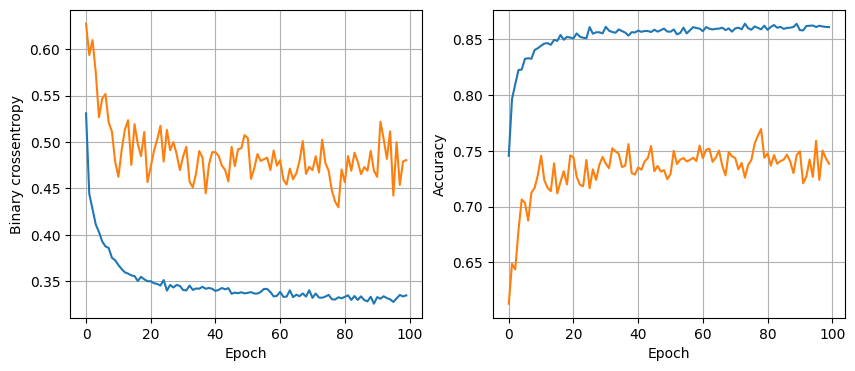

119/119 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8691
16 nodes, dropout0.2,lr0.001, batch size 64


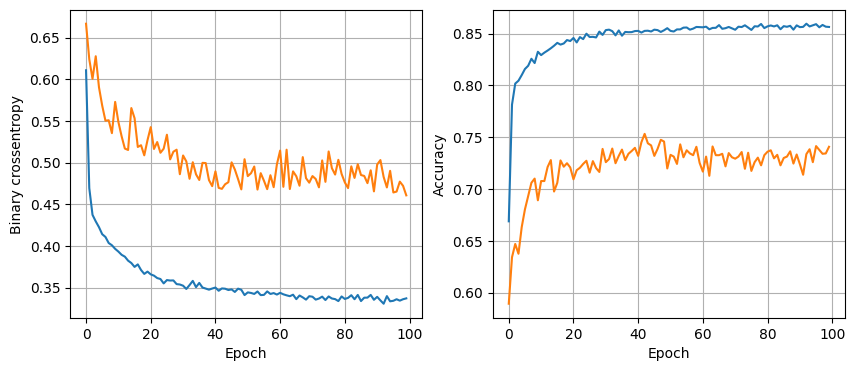

119/119 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8715
16 nodes, dropout0.2,lr0.001, batch size 128


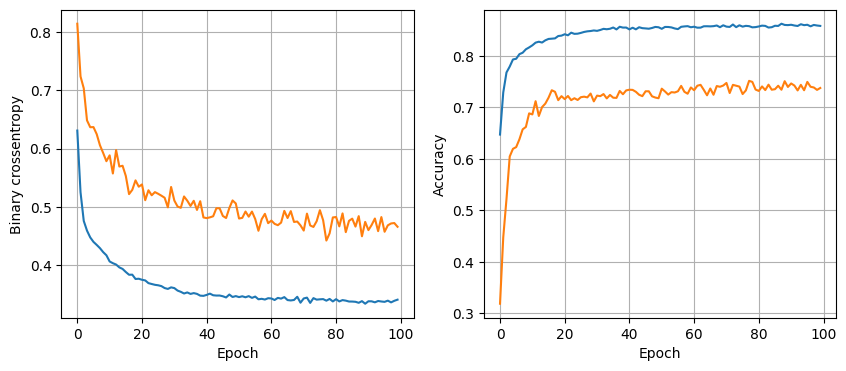

119/119 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8662
32 nodes, dropout0,lr0.01, batch size 32


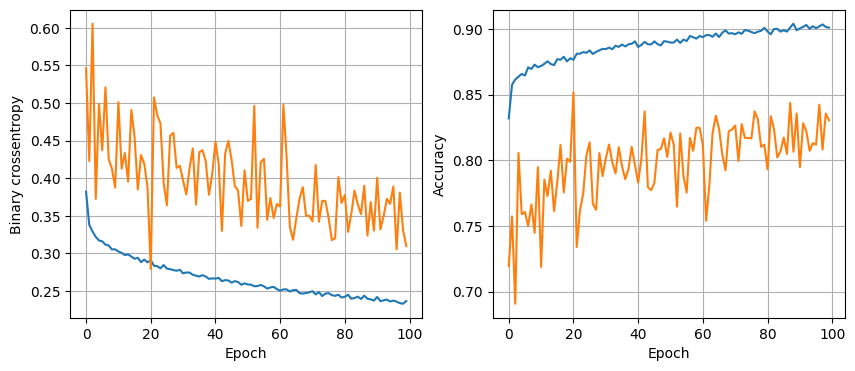

119/119 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8670
32 nodes, dropout0,lr0.01, batch size 64


KeyboardInterrupt: ignored

In [54]:
least_val_loss = [float('inf'),float('inf')]
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in[0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout{dropout_prob},lr{lr}, batch size {batch_size}")
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, Y_valid)
        if val_loss < least_val_loss :
          least_val_loss = val_loss
          least_loss_model = model

In [59]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, 1)


119/119 [==============================] - 0s 3ms/step


In [56]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1372
           1       0.85      0.94      0.90      2432

    accuracy                           0.86      3804
   macro avg       0.87      0.83      0.84      3804
weighted avg       0.86      0.86      0.86      3804

